In [1]:
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
def draw_graph(G):
    """
    Draw a graph using NetworkX and Matplotlib.
    Works with both Graph and DiGraph.
    Automatically shows edge weights if present.
    
    Parameters:
    -----------
    G : networkx.Graph or networkx.DiGraph
        The graph to draw
    """
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    
    # Draw with arrows if it's a directed graph
    if G.is_directed():
        nx.draw(G, pos, with_labels=True, node_color='lightblue', 
                node_size=800, font_size=16, font_weight='bold',
                edge_color='black', width=2, arrows=True, 
                arrowsize=20, arrowstyle='->', connectionstyle='arc3,rad=0.1')
    else:
        nx.draw(G, pos, with_labels=True, node_color='lightblue', 
                node_size=800, font_size=16, font_weight='bold',
                edge_color='black', width=2)
    
    # Draw edge weights if they exist
    edge_labels = nx.get_edge_attributes(G, 'weight')
    if edge_labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
    
    plt.axis('off')
    plt.show()


Number of nodes (N): 4
Number of edges (L): 4
Edges: [(1, 2), (1, 3), (2, 3), (2, 4)]

Degree of each node: {1: 2, 2: 3, 3: 2, 4: 1}
Average degree: 2.0
Average degree (using 2L/N): 2.0


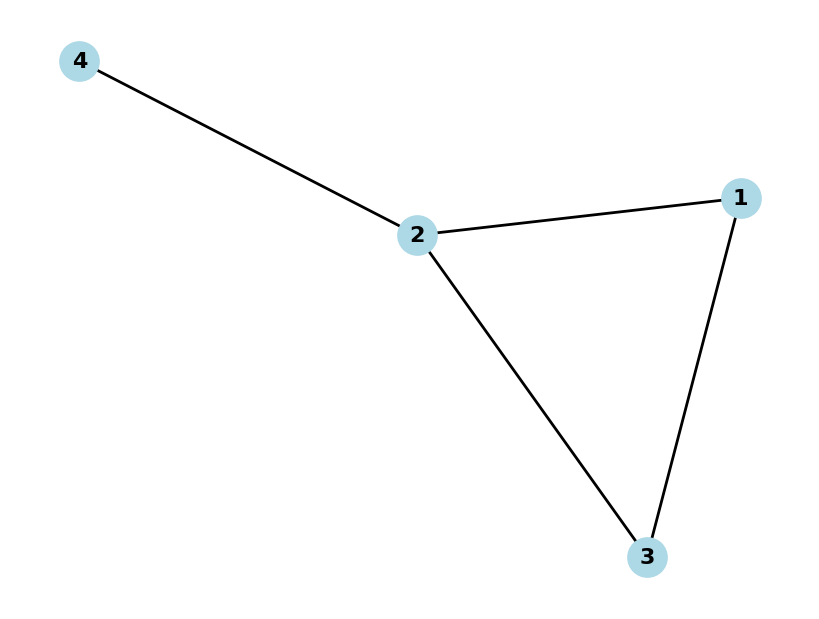

In [3]:
# Create a graph with N=4 nodes and L=4 edges
G = nx.Graph()

# Add nodes one by one
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

# Add edges one by one
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(2, 4)

# Print graph info
print(f"Number of nodes (N): {G.number_of_nodes()}")
print(f"Number of edges (L): {G.number_of_edges()}")
print(f"Edges: {list(G.edges())}")

# Calculate and print degree information
# (we need to convert the degrees to a dictionary)
degrees = dict(G.degree())
print(f"\nDegree of each node: {degrees}")

# Calculate average degree
avg_degree = sum(degrees.values()) / G.number_of_nodes()
print(f"Average degree: {avg_degree}")

# Alternative formula: <k> = 2L/N
avg_degree_formula = (2 * G.number_of_edges()) / G.number_of_nodes()
print(f"Average degree (using 2L/N): {avg_degree_formula}")

# Draw the graph
draw_graph(G)


Number of nodes (N): 4
Number of edges (L): 4
Edges: [(1, 2), (1, 3), (2, 3), (2, 4)]


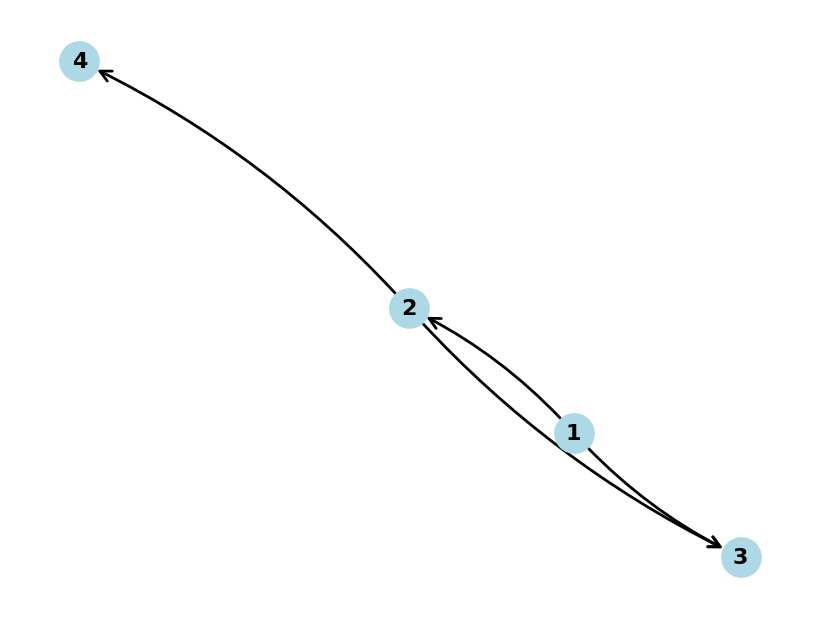

In [4]:
# Create a directed graph (DiGraph) with N=4 nodes and L=4 edges
DG = nx.DiGraph()

# Add directed edges (nodes are added automatically)
edges = [(1, 2), (1, 3), (2, 3), (2, 4)]
DG.add_edges_from(edges)

# Print graph info
print(f"Number of nodes (N): {DG.number_of_nodes()}")
print(f"Number of edges (L): {DG.number_of_edges()}")
print(f"Edges: {list(DG.edges())}")

# Draw the directed graph
draw_graph(DG)


DiGraph with bidirectional edges:
Edges: [(1, 2), (1, 3), (2, 1), (2, 4), (3, 2), (4, 2)]


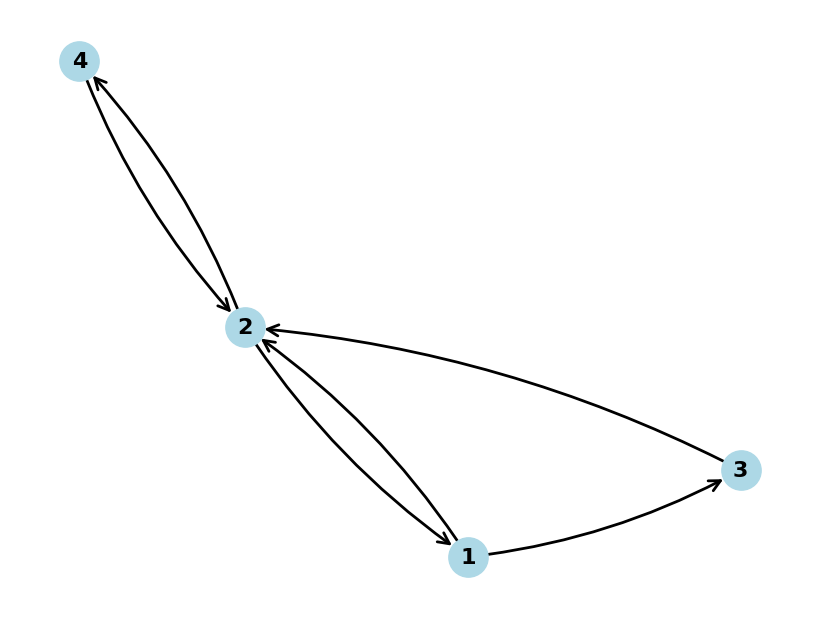

In [5]:
# Example: DiGraph with bidirectional edges
DG2 = nx.DiGraph()

# Add edges in both directions for some connections
edges = [(1, 2), (2, 1),  # Bidirectional between 1 and 2
         (1, 3),          # Only 1 -> 3
         (3, 2),          # Only 3 -> 2
         (2, 4), (4, 2)]  # Bidirectional between 2 and 4

DG2.add_edges_from(edges)

print(f"DiGraph with bidirectional edges:")
print(f"Edges: {list(DG2.edges())}")
draw_graph(DG2)


Number of nodes (N): 4
Number of edges (L): 4
Edges with weights: [(1, 2, 5), (1, 3, 3), (2, 3, 7), (2, 4, 2)]


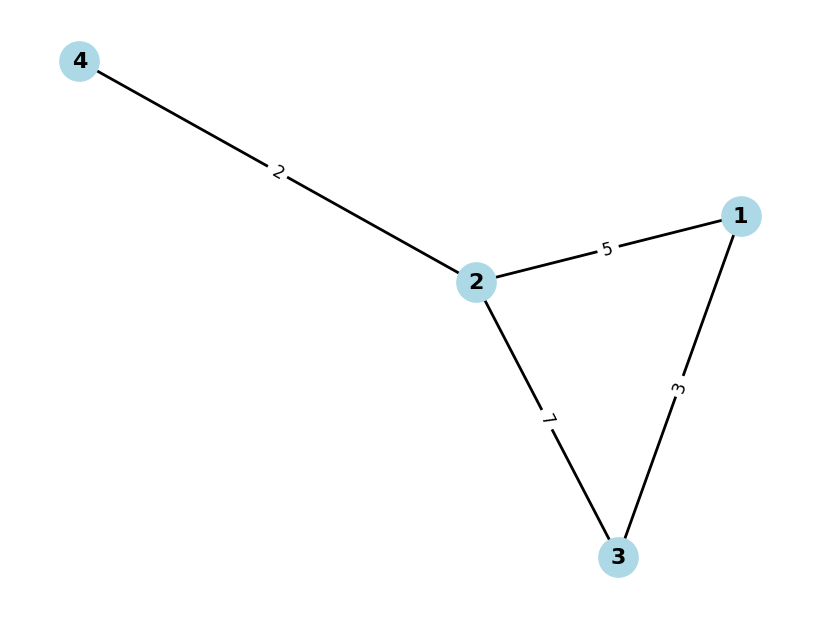

In [6]:
# Create a weighted graph with N=4 nodes and L=4 edges
GW = nx.Graph()

# Add nodes one by one
GW.add_node(1)
GW.add_node(2)
GW.add_node(3)
GW.add_node(4)

# Add edges one by one with weights
GW.add_edge(1, 2, weight=5)
GW.add_edge(1, 3, weight=3)
GW.add_edge(2, 3, weight=7)
GW.add_edge(2, 4, weight=2)

# Print graph info
print(f"Number of nodes (N): {GW.number_of_nodes()}")
print(f"Number of edges (L): {GW.number_of_edges()}")
print(f"Edges with weights: {list(GW.edges(data='weight'))}")

# Draw the weighted graph - weights are shown automatically!
draw_graph(GW)


In [7]:
# Load the phone calls graph from edgelist as a directed graph
phone_graph = nx.read_edgelist('networks/phonecalls.edgelist.txt', create_using=nx.DiGraph())

# Print basic information about the graph
print(f"Phone Calls Network (Directed):")
print(f"Number of nodes (N): {phone_graph.number_of_nodes()}")
print(f"Number of edges (L): {phone_graph.number_of_edges()}")

# Calculate and print degree statistics for directed graphs
in_degrees = dict(phone_graph.in_degree())
out_degrees = dict(phone_graph.out_degree())

avg_in_degree = sum(in_degrees.values()) / phone_graph.number_of_nodes()
avg_out_degree = sum(out_degrees.values()) / phone_graph.number_of_nodes()

print(f"\nAverage in-degree: {avg_in_degree:.2f}")
print(f"Average out-degree: {avg_out_degree:.2f}")

# Show min and max degrees
print(f"\nIn-degree range: {min(in_degrees.values())} to {max(in_degrees.values())}")
print(f"Out-degree range: {min(out_degrees.values())} to {max(out_degrees.values())}")

Phone Calls Network (Directed):
Number of nodes (N): 36595
Number of edges (L): 91826

Average in-degree: 2.51
Average out-degree: 2.51

In-degree range: 0 to 77
Out-degree range: 0 to 41
